In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("moved_games.csv")
df.head()


In [2]:
columns = df.columns

In [3]:
new_columns = []
for col in columns:
    new_columns.append(col.lower())

In [4]:
df.columns = new_columns

In [5]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [11]:
df.shape

(7878, 11)

In [12]:
df["year_of_release"] = df["year_of_release"].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7878 non-null   object 
 1   platform         7878 non-null   object 
 2   year_of_release  7878 non-null   int64  
 3   genre            7878 non-null   object 
 4   na_sales         7878 non-null   float64
 5   eu_sales         7878 non-null   float64
 6   jp_sales         7878 non-null   float64
 7   other_sales      7878 non-null   float64
 8   critic_score     7878 non-null   float64
 9   user_score       7878 non-null   object 
 10  rating           7878 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 738.6+ KB


In [13]:
df['user_score'] = df['user_score'].replace(['tbd'], [0])

In [17]:
df["user_score"] = df["user_score"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7878 non-null   object 
 1   platform         7878 non-null   object 
 2   year_of_release  7878 non-null   int64  
 3   genre            7878 non-null   object 
 4   na_sales         7878 non-null   float64
 5   eu_sales         7878 non-null   float64
 6   jp_sales         7878 non-null   float64
 7   other_sales      7878 non-null   float64
 8   critic_score     7878 non-null   float64
 9   user_score       7878 non-null   float64
 10  rating           7878 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 738.6+ KB


In [18]:
df['total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [20]:
games_per_year = df.groupby("year_of_release")["platform"].count()

In [21]:
games_per_year

year_of_release
1985      1
1988      1
1992      1
1994      1
1996      7
1997     14
1998     25
1999     36
2000    141
2001    325
2002    627
2003    582
2004    556
2005    652
2006    617
2007    692
2008    708
2009    644
2010    496
2011    486
2012    313
2013    267
2014    257
2015    212
2016    217
Name: platform, dtype: int64

Significant Periods:
year_of_release
2000    141
2001    325
2002    627
2003    582
2004    556
2005    652
2006    617
2007    692
2008    708
2009    644
2010    496
2011    486
2012    313
2013    267
2014    257
2015    212
2016    217
Name: platform, dtype: int64


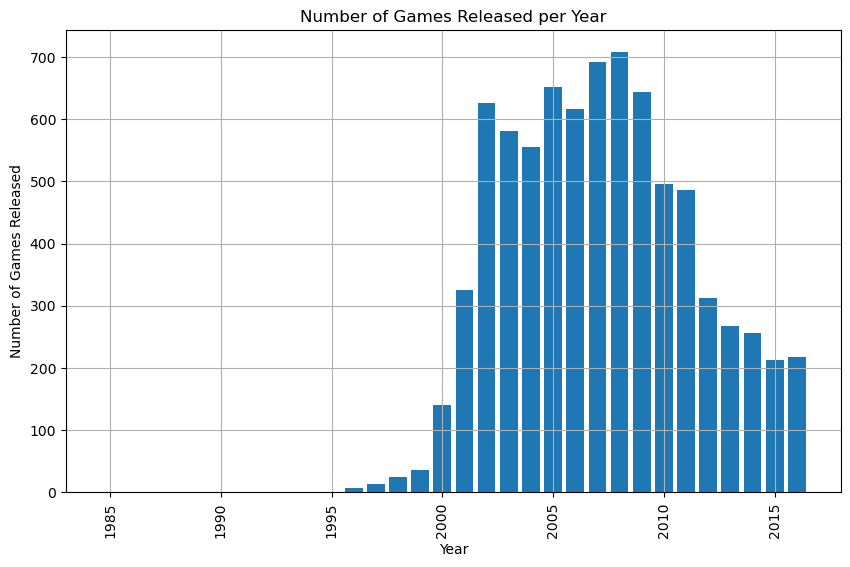

In [24]:
# Plotting the number of games released per year
plt.figure(figsize=(10, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released per Year')
plt.xticks(rotation=90)
plt.grid()

significant_periods = games_per_year[games_per_year >= 100]  # Consider periods with 100 or more games as significant

# Printing the significant periods and their corresponding game counts
print('Significant Periods:')
print(significant_periods)

# Displaying the graph
plt.show()

In [26]:
# group by platform and sum the total sales for each platform
region_platform_sales = df.groupby("platform")["total"].sum().sort_values(ascending=False)
region_platform_sales

platform
PS2     981.53
X360    858.66
PS3     788.92
Wii     682.11
DS      433.97
PS4     243.05
XB      226.66
PS      217.70
PSP     196.55
PC      186.76
GC      169.37
GBA     165.66
XOne    129.62
3DS     124.13
WiiU     66.27
PSV      30.94
DC        4.55
Name: total, dtype: float64

In [27]:
# sort the platforms by total sales and select the top 5
top_platforms = region_platform_sales.sort_values(ascending=False).head(5)
top_platforms

platform
PS2     981.53
X360    858.66
PS3     788.92
Wii     682.11
DS      433.97
Name: total, dtype: float64

In [28]:
# filter the data to only include the top platforms
top_platform_data = df[df['platform'].isin(top_platforms.index)]
top_platform_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,World Heroes Anthology,PS2,2007,Fighting,0.00,0.00,0.01,0.00,53.0,0.0,T,0.01
16529,Hoshigami: Ruining Blue Earth Remix,DS,2007,Role-Playing,0.00,0.00,0.01,0.00,55.0,7.9,T,0.01
16591,Micro Machines V4,PS2,2006,Racing,0.01,0.00,0.00,0.00,64.0,6.8,E,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


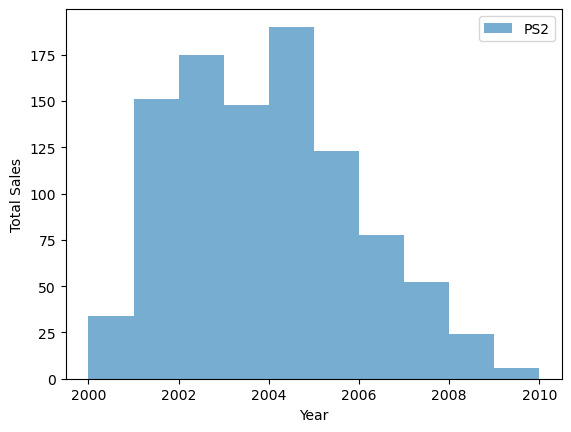

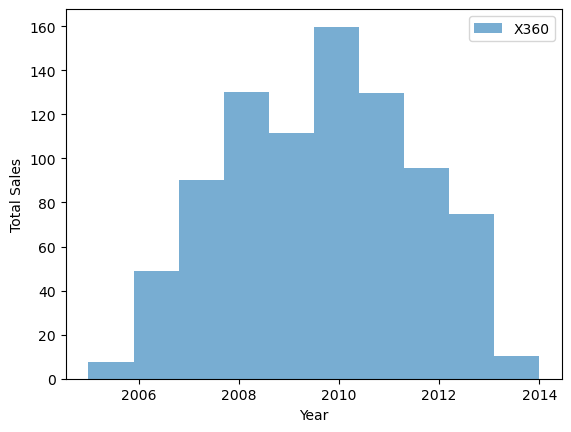

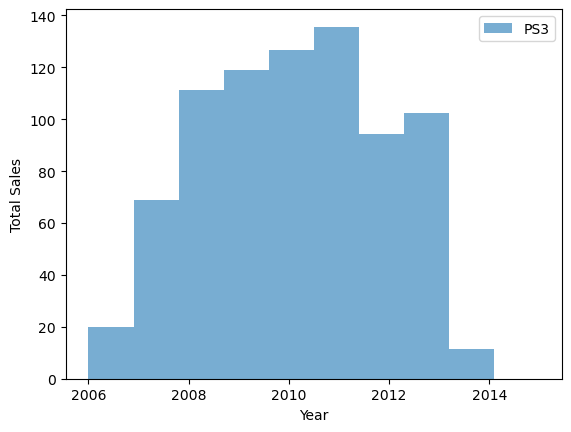

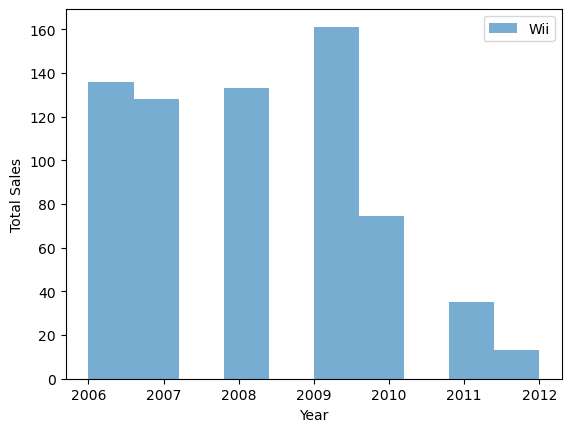

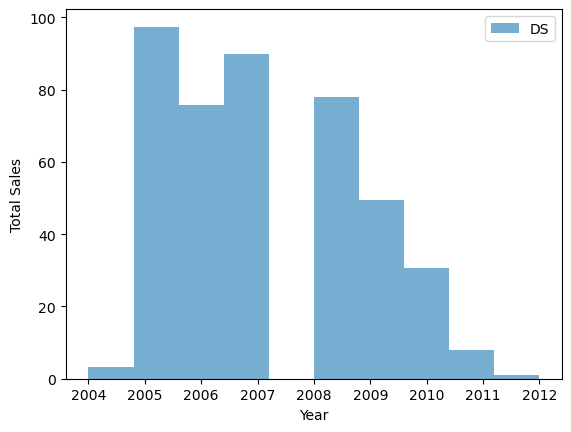

In [29]:
from matplotlib import pyplot as plt
# plot the distribution of sales for each platform by year

for platform in top_platforms.index:
    fig,axis = plt.subplots()
    platform_data = top_platform_data[top_platform_data['platform'] == platform]
    plt.hist(platform_data['year_of_release'], weights=platform_data['total'], alpha=0.6, label=platform)

    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()

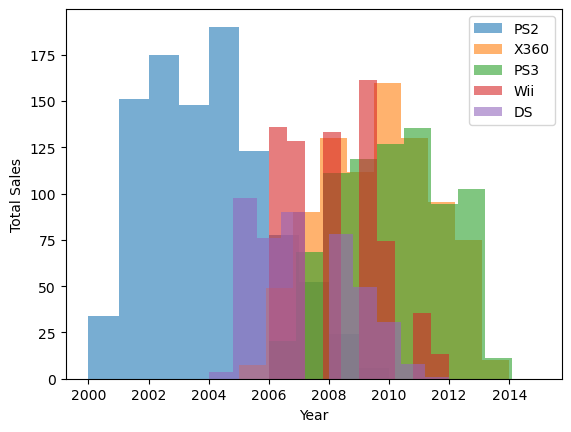

In [32]:
# plot the distribution of sales for each platform by year
for platform in top_platforms.index:
    platform_data = top_platform_data[top_platform_data['platform'] == platform]
    plt.hist(platform_data['year_of_release'], weights=platform_data['total'], alpha=0.6, label=platform)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [33]:
data = df.query('year_of_release > 2010', inplace = False).sort_values('year_of_release', ascending = False)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
5849,Naruto Shippuden: Ultimate Ninja Storm 4,XOne,2016,Fighting,0.21,0.07,0.00,0.03,81.0,8.5,T,0.31
1948,Overwatch,XOne,2016,Shooter,0.63,0.33,0.00,0.10,91.0,5.6,T,1.06
11301,BlazBlue Central Fiction,PS4,2016,Fighting,0.04,0.00,0.03,0.01,85.0,7.6,T,0.08
2056,Pokken Tournament,WiiU,2016,Fighting,0.50,0.26,0.17,0.08,76.0,8.0,E10+,1.01
11397,Battleborn,PC,2016,Shooter,0.04,0.04,0.00,0.01,69.0,6.9,T,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...
8951,The Cursed Crusade,X360,2011,Action,0.08,0.05,0.00,0.01,39.0,4.4,M,0.14
8962,Pac-Man Party 3D,3DS,2011,Misc,0.09,0.04,0.00,0.01,43.0,5.4,E,0.14
2860,DiRT 3,X360,2011,Racing,0.23,0.40,0.01,0.08,87.0,7.1,T,0.72
8971,Black * Rock Shooter: The Game,PSP,2011,Role-Playing,0.00,0.00,0.15,0.00,66.0,7.2,T,0.15


In [34]:
#top 10 games by sales
data.sort_values('total', ascending=False)[:10]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


In [35]:
#Platform leading in sales
leading_platforms = data.groupby('platform')['total'].sum().sort_values(ascending=False)
leading_platforms

platform
PS3     343.54
X360    310.42
PS4     243.05
XOne    129.62
3DS     124.13
PC       85.04
WiiU     66.27
Wii      48.60
PSV      30.94
DS        8.89
PSP       4.19
Name: total, dtype: float64

In [36]:
#platform growing or shrinking
sales_change = data.groupby(['year_of_release', 'platform'])['total'].sum()
sales_change

year_of_release  platform
2011             3DS          44.42
                 DS            7.87
                 PC           30.73
                 PS3         135.66
                 PSP           4.04
                 PSV           3.88
                 Wii          35.37
                 X360        129.82
2012             3DS          39.39
                 DS            1.02
                 PC           20.41
                 PS3          94.30
                 PSV          13.07
                 Wii          13.23
                 WiiU         14.85
                 X360         95.68
2013             3DS          15.89
                 PC           10.86
                 PS3         102.22
                 PS4          25.07
                 PSP           0.15
                 PSV           5.96
                 WiiU         17.40
                 X360         74.82
                 XOne         14.92
2014             3DS          11.71
                 PC           11.21
  

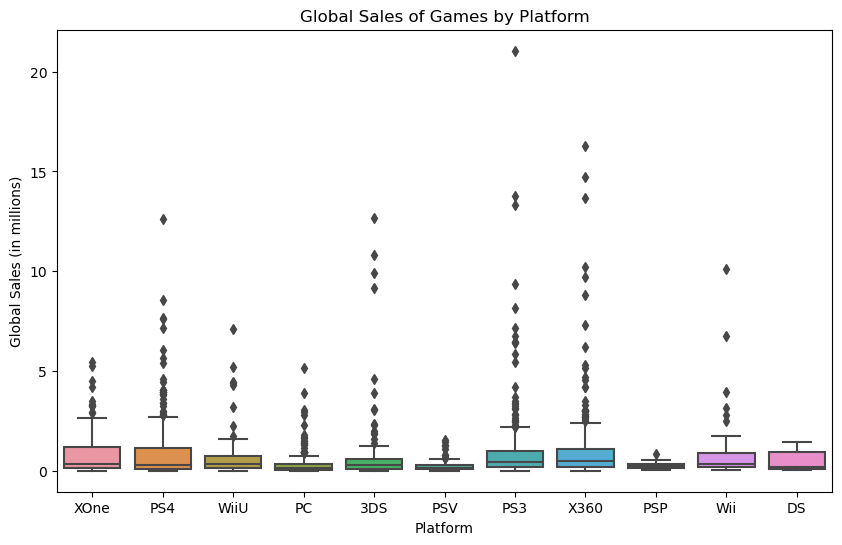

In [107]:
#box plot for global sales of all games by platform
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='platform', y='total', data=data)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

To analyze the significance of the differences in sales, we can compare the interquartile range (IQR) of each platform. If the IQR of two platforms overlap, then the difference in sales is not significant. However, if the IQRs do not overlap, then there is a significant difference

In [37]:
#average sales per platform
avg_sales_by_platform = data.groupby('platform')['total'].mean()

#median sales per platform
med_sales_by_platform = data.groupby('platform')['total'].median()
print(avg_sales_by_platform, med_sales_by_platform)

platform
3DS     0.752303
DS      0.444500
PC      0.329612
PS3     0.995768
PS4     1.008506
PSP     0.299286
PSV     0.260000
Wii     1.034043
WiiU    0.736333
X360    1.063082
XOne    0.805093
Name: total, dtype: float64 platform
3DS     0.290
DS      0.175
PC      0.140
PS3     0.470
PS4     0.320
PSP     0.230
PSV     0.170
Wii     0.340
WiiU    0.370
X360    0.475
XOne    0.360
Name: total, dtype: float64


We can also analyze the average sales on various platforms by calculating the mean and median for each platform. If the mean and median are close together, then the sales are relatively evenly distributed. However, if the mean is higher than the median, then there may be some outlier sales that are skewing the data.

In [71]:
#Getting the data for one popular platform
ps3 = data[data['platform'] == 'PS3']
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
15418,Xblaze: Lost Memories,PS3,2015,Adventure,0.02,0.00,0.00,0.00,63.0,6.2,M,0.02
12898,Enemy Front,PS3,2014,Shooter,0.01,0.04,0.00,0.01,43.0,6.0,M,0.06
16146,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01
7710,Castlevania: Lords of Shadow 2,PS3,2014,Action,0.03,0.12,0.02,0.03,63.0,7.8,M,0.20
2248,South Park: The Stick of Truth,PS3,2014,Role-Playing,0.43,0.34,0.00,0.16,85.0,8.5,M,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...
2704,Duke Nukem Forever,PS3,2011,Shooter,0.33,0.31,0.00,0.12,51.0,4.9,M,0.76
9284,Rio,PS3,2011,Misc,0.04,0.07,0.00,0.02,65.0,0.0,E10+,0.13
2806,Brink,PS3,2011,Shooter,0.29,0.32,0.01,0.12,72.0,5.8,T,0.74
2964,Top Spin 4,PS3,2011,Sports,0.17,0.39,0.00,0.13,82.0,7.7,E,0.69


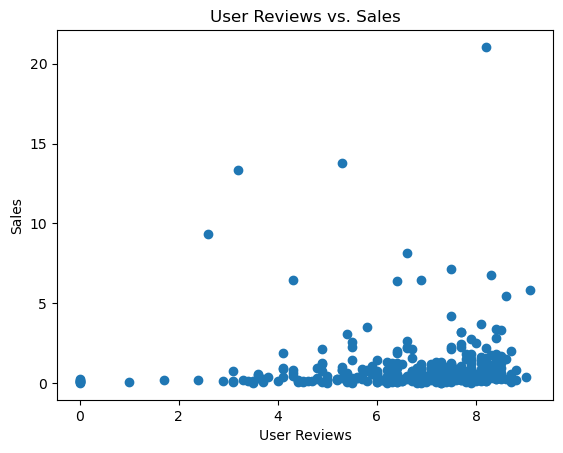

In [72]:
# Create scatter plot of user score against sales for ps2
plt.scatter(ps3['user_score'], ps3['total'])
plt.title('User Reviews vs. Sales')
plt.xlabel('User Reviews')
plt.ylabel('Sales')

# Show plot
plt.show()




In [59]:
# Calculate correlation
corr = ps3['user_score'].corr(ps3['total'])
print('Correlation: ', corr)

Correlation:  0.1724794903209302


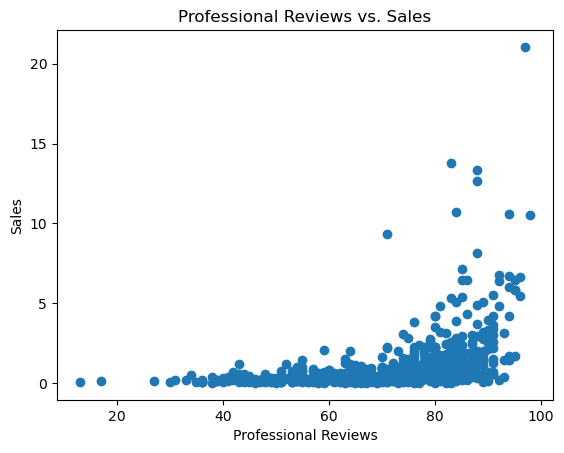

In [60]:
# Create scatter plot
plt.scatter(ps3['critic_score'], ps3['total'])
plt.title('Professional Reviews vs. Sales')
plt.xlabel('Professional Reviews')
plt.ylabel('Sales')

# Show plot
plt.show()

In [61]:
# Calculate correlation
corr = ps3['critic_score'].corr(ps3['total'])
print('Correlation: ', corr)

Correlation:  0.43219727441786737


In [55]:
#get the platforms
all_platforms = df['platform'].unique()
all_platforms

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [56]:
other_platforms = []
for platform in all_platforms:
    if platform not in leading_platforms:
        other_platforms.append(platform)
other_platforms

['PS2', 'PS', 'XB', 'GC', 'GBA', 'DC']

In [70]:
other_platform_data = df[df['platform']=='PS2']

Text(0, 0.5, 'Sales')

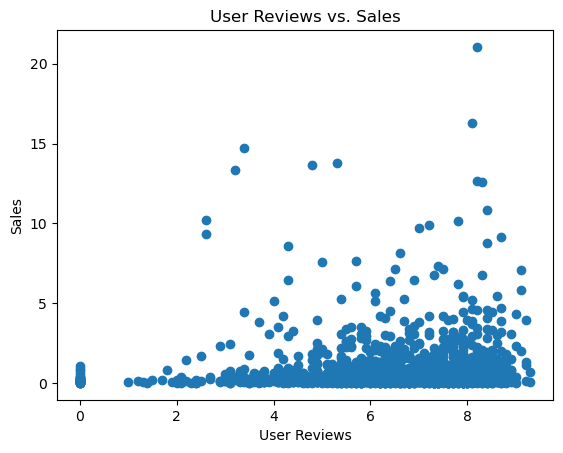

In [52]:
#scatterplot of user reviews and sales of top 10 games
plt.scatter(data['user_score'], data['total'])
plt.title('User Reviews vs. Sales')
plt.xlabel('User Reviews')
plt.ylabel('Sales')

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [ ]:
for platform in platforms:
    plt.scatter(ps2['user_score'], ps2['total'])
    plt.title('Professional Reviews vs. Sales')
    plt.xlabel('Professional Reviews')
    plt.ylabel('Sales')